In [2]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
engine.execute('Select * From measurement Limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


<IPython.core.display.Javascript object>


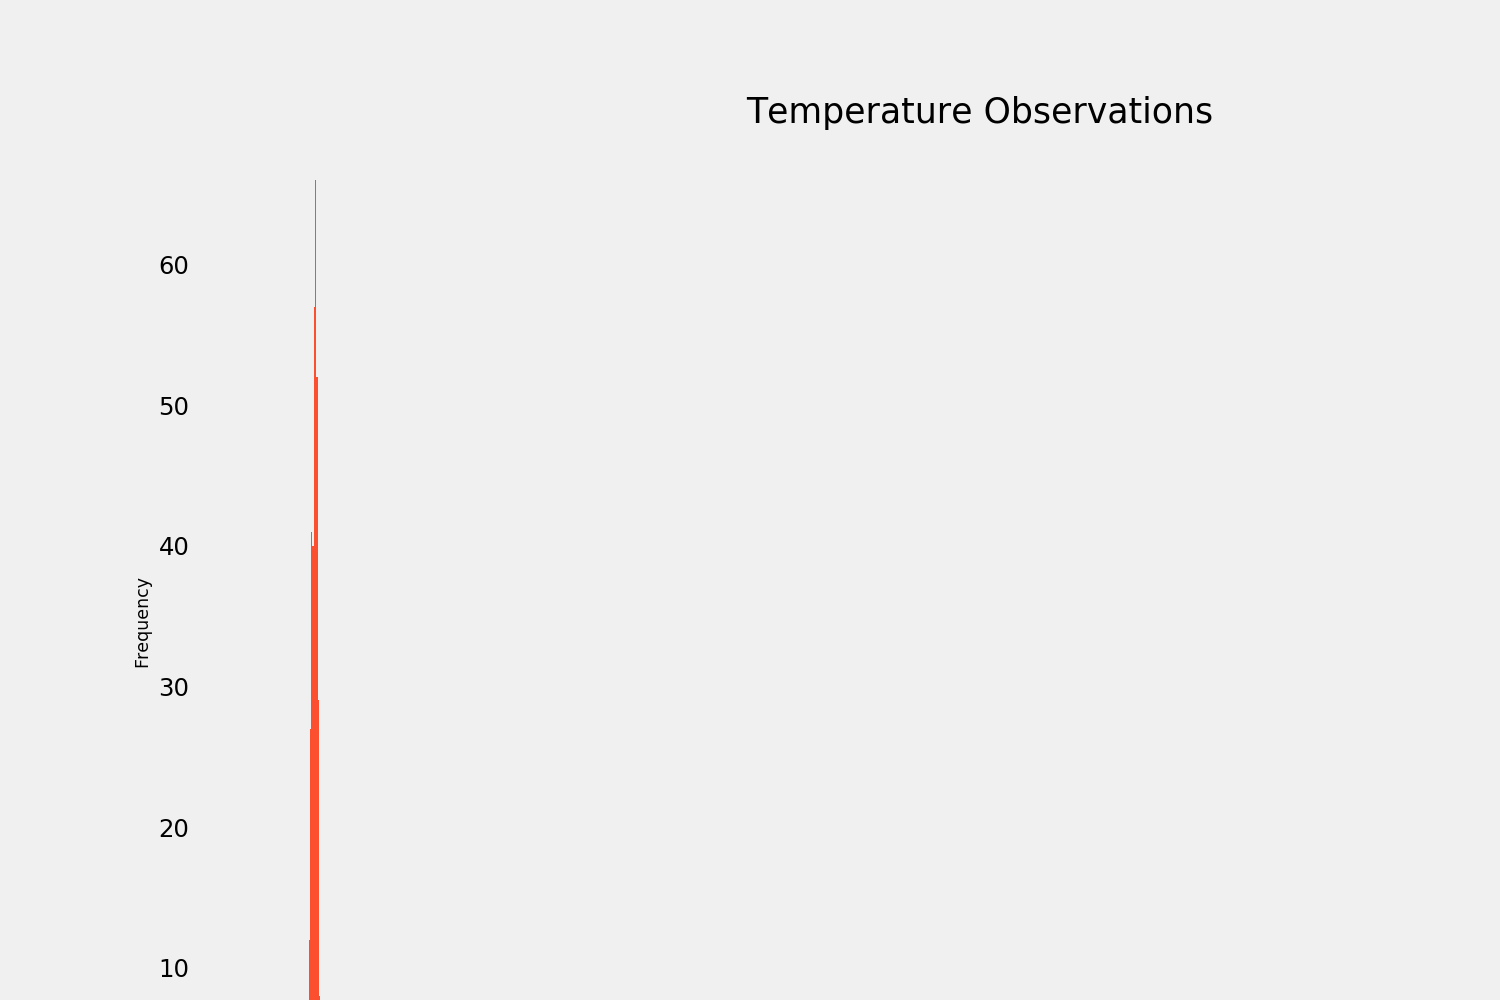

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain).fillna(0)
rain_df.head()

# Sort the dataframe by date
rain_df.set_index('date').head()

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])


# Rotate the xticks for the dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

In [13]:
# How many stations are available in this dataset?
stations_count = session.query(Measurement).group_by(Measurement.station).count()
stations_count

9

In [14]:
# What are the most active stations?
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

busiest_station = active_stations[0][0]    
print("Most active station: ",busiest_station)
# List the stations and the counts in descending order.
active_stations

Most active station:  USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest_station).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.tobs).all()


# highest temperature recorded, and average temperature most active station?
temperature

[('USC00519281', '2017-02-02', 59.0),
 ('USC00519281', '2017-02-08', 59.0),
 ('USC00519281', '2017-02-09', 59.0),
 ('USC00519281', '2017-02-03', 60.0),
 ('USC00519281', '2017-04-30', 60.0),
 ('USC00519281', '2017-02-25', 61.0),
 ('USC00519281', '2016-12-15', 62.0),
 ('USC00519281', '2017-01-06', 62.0),
 ('USC00519281', '2017-01-09', 62.0),
 ('USC00519281', '2017-01-10', 62.0),
 ('USC00519281', '2017-02-10', 62.0),
 ('USC00519281', '2017-03-07', 62.0),
 ('USC00519281', '2016-11-07', 63.0),
 ('USC00519281', '2017-01-04', 63.0),
 ('USC00519281', '2017-01-05', 63.0),
 ('USC00519281', '2017-01-11', 63.0),
 ('USC00519281', '2017-01-03', 64.0),
 ('USC00519281', '2017-02-07', 64.0),
 ('USC00519281', '2017-03-08', 64.0),
 ('USC00519281', '2016-12-13', 65.0),
 ('USC00519281', '2017-01-12', 65.0),
 ('USC00519281', '2017-01-28', 65.0),
 ('USC00519281', '2017-02-16', 65.0),
 ('USC00519281', '2017-02-27', 65.0),
 ('USC00519281', '2017-03-18', 65.0),
 ('USC00519281', '2017-05-01', 65.0),
 ('USC005192

In [16]:
# Converting to a list
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


### Filter by station with highest number of observations
highest_obs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2017-01-01').\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
highest_obs

rain_df = pd.DataFrame(temperature, columns=['Station', 'date', 'temperature'])
rain_df.set_index('Station', inplace=True)
rain_df.head()

hist_plot = rain_df['temperature'].hist(bins=12, figsize=(15,10))
hist_plot.set_title('Temperature Observations', fontsize=20)
hist_plot.set_ylabel('Frequency', fontsize=10)
plt.grid()
plt.show()

#not showing the histogram########

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    
    start_date_new = datetime.datetime.strptime(start_date, "%Y-%m-%d") - datetime.timedelta(days=365)
    end_date_new = datetime.datetime.strptime(end_date, "%Y-%m-%d") - datetime.timedelta(days=365)
    
  
    
# Put query into DataFrame so that you can graph using pandas
    rain_df = pd.DataFrame(tobs_query_new)
    
# Calculate min, avg, max of temperature (including error bar of temp (yerr))
min_temp = rain_df.min()
max_temp = rain_df.max()
avg_temp = rain_df.mean()
yerr_temp = max_temp - min_temp
    
# Graph using bar chart: avg temp = bar height
plt.figure(figsize=(10, 20))
plt.ylabel('Temp')
plt.title('Trip Average Temp')
plt.grid()
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`